In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configuration for plotting and warnings
sns.set(context='notebook', font_scale=1.1, 
        style='ticks', rc={'figure.figsize': (8, 3), 'figure.facecolor': 'none', 'axes.facecolor': 'none'})
plt.set_loglevel('WARNING')
plt.rcParams.update({'lines.markeredgewidth': 1})
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'svg'

In [2]:
# Load dataframes
df_waymax = pd.read_csv('waymax.csv')
df_gpudrive = pd.read_csv('gpudrive_0505.csv')

df_gpudrive['Sim'] = 'GPUDrive'
df_waymax['Sim'] = 'Waymax' 

In [3]:
df_waymax

,Device,Reset,Step,num_envs,Sim
0,GPU v100,0.64,0.92,1,Waymax
1,GPU v100,0.81,2.86,16,Waymax


In [9]:
df_gpudrive_select = df_gpudrive[['Device', 'Reset', 'Step', 'num_envs', 'Sim']]
df_gpudrive_select

df_compare = pd.concat([df_gpudrive_select, df_waymax])

In [10]:
# Ensure the index is unique by resetting it if necessary
if not df_compare.index.is_unique:
    df_compare.reset_index(drop=True, inplace=True)

# Round values in 'Reset' and 'Step' columns to two decimal places
df_compare['Reset'] = df_compare['Reset'].round(2)
df_compare['Step'] = df_compare['Step'].round(2)

# Ensure column names are unique (adjust as needed if there are duplicates)
# This step is typically unnecessary unless your DataFrame creation process introduced duplicate names.

# Now apply the styling
def style_specific_values(val):
    color = 'darkblue' if val == 'GPUDrive' else 'orange'
    return f'color: {color}; font-size:1.3em;'

styled_df = df_compare.sort_values(by='num_envs').round(2)
styled_df = styled_df.style.applymap(style_specific_values, subset=['Sim'])
styled_df = styled_df.format({'Reset': "{:.2f}", 'Step': "{:.2f}"})

styled_df

,Device,Reset,Step,num_envs,Sim
2,GPU v100,0.03,3.32,1,GPUDrive
9,GPU v100,0.64,0.92,1,Waymax
10,GPU v100,0.81,2.86,16,Waymax
0,GPU v100,4.19,24.45,16,GPUDrive
3,GPU v100,10.84,38.91,26,GPUDrive
4,GPU v100,41.92,78.12,51,GPUDrive
5,GPU v100,96.35,122.31,76,GPUDrive
6,GPU v100,181.47,170.40,101,GPUDrive
7,GPU v100,303.93,233.59,126,GPUDrive
8,GPU v100,455.23,294.84,151,GPUDrive


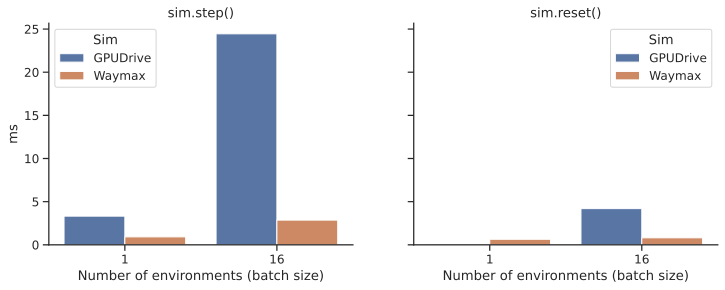

In [11]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 4))

sns.barplot(x='num_envs', y='Step', hue='Sim', data=df_compare[df_compare['num_envs'] < 20], ax=axs[0])
axs[0].set_title('sim.step()')
axs[0].set_ylabel('ms')
axs[0].set_xlabel('Number of environments (batch size)')

sns.barplot(x='num_envs', y='Reset', hue='Sim', data=df_compare[df_compare['num_envs'] < 20], ax=axs[1])
axs[1].set_title('sim.reset()')
axs[1].set_ylabel('ms')
axs[1].set_xlabel('Number of environments (batch size)')

sns.despine()

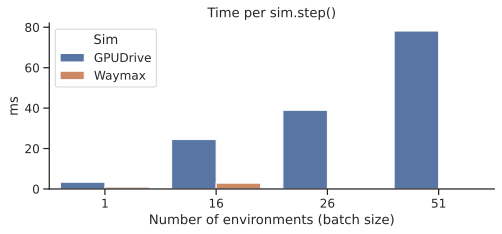

In [12]:
sns.barplot(x='num_envs', y='Step', hue='Sim', data=df_compare[df_compare['num_envs'] < 60])
plt.title('Time per sim.step()')
plt.ylabel('ms')
plt.xlabel('Number of environments (batch size)')
sns.despine()

In [13]:
df_gpudrive

,actual_num_agents,actual_num_roads,useful_num_agents,useful_num_roads,num_envs,Reset,Step,fps,afps,useful_afps,exec_mode,datasetInitOptions,Device,Sim
0,2048,48000,2048,9568,16,4.194439,24.454537,40.892207,83747.239615,83747.239615,CUDA,PadN,GPU v100,GPUDrive
1,25600,600000,25600,119600,200,827.245223,411.738126,2.428728,62175.442138,62175.442138,CUDA,PadN,GPU v100,GPUDrive
2,128,3000,128,598,1,0.034593,3.316163,301.553354,38598.829318,38598.829318,CUDA,PadN,GPU v100,GPUDrive
3,3328,78000,3328,15548,26,10.840683,38.905234,25.703482,85541.189311,85541.189311,CUDA,PadN,GPU v100,GPUDrive
4,6528,153000,6528,30498,51,41.919421,78.119924,12.800832,83563.829136,83563.829136,CUDA,PadN,GPU v100,GPUDrive
5,9728,228000,9728,45448,76,96.347053,122.306096,8.176207,79538.144709,79538.144709,CUDA,PadN,GPU v100,GPUDrive
6,12928,303000,12928,60398,101,181.469602,170.401478,5.868494,75867.886674,75867.886674,CUDA,PadN,GPU v100,GPUDrive
7,16128,378000,16128,75348,126,303.931794,233.587774,4.281046,69044.709522,69044.709522,CUDA,PadN,GPU v100,GPUDrive
8,19328,453000,19328,90298,151,455.233977,294.840484,3.391664,65554.091178,65554.091178,CUDA,PadN,GPU v100,GPUDrive


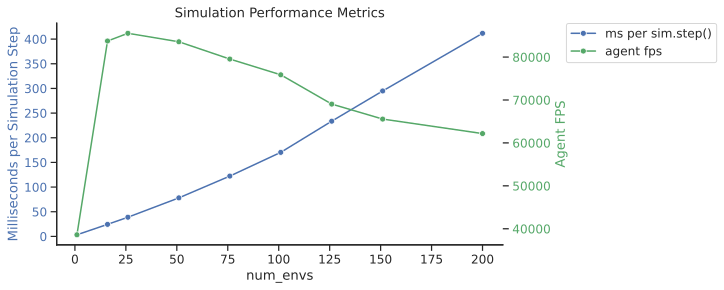

In [17]:
fig, ax1 = plt.subplots(figsize=(8, 4))

# Create the first line plot on ax1
sns.lineplot(x='num_envs', y='Step', data=df_gpudrive, label='ms per sim.step()', marker='o', ax=ax1, color='b', legend=False)
ax1.set_ylabel('Milliseconds per Simulation Step', color='b')  # Set label and tick colors
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for the second line plot
ax2 = ax1.twinx()
sns.lineplot(x='num_envs', y='afps', data=df_gpudrive, label='agent fps', marker='o', ax=ax2, color='g', legend=False)
ax2.set_ylabel('Agent FPS', color='g')  # Set label and tick colors
ax2.tick_params(axis='y', labelcolor='g')

# Title and legend
plt.title('Simulation Performance Metrics')
ax1.figure.legend(loc='upper left', bbox_to_anchor=(1, 0.9))

# Remove top and right borders
sns.despine()

# Show plot
plt.show()